In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_svmlight_file
X_train, y_train = load_svmlight_file("EN-EN")


In [3]:
datanum=250
classsel = []
skipsize = 2
for i in np.unique(y_train):
    tempsel = np.where(y_train == i)[0][::skipsize]
    classsel.append(tempsel[:datanum])

classsel = np.concatenate(np.array(classsel))
print(len(classsel))
X_sel = X_train[classsel]
y_sel = y_train[classsel]


1500


In [4]:
(X_sel).shape

(1500, 21531)

In [5]:
len(np.unique(y_train))

6

In [6]:
X_train,np.size(y_train)

(<18758x21531 sparse matrix of type '<class 'numpy.float64'>'
 	with 1396018 stored elements in Compressed Sparse Row format>,
 18758)

In [7]:
from sklearn import preprocessing
X_sel = preprocessing.normalize(X_sel,norm="l2")
X_sel = X_sel.todense()


In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer,StandardScaler

pca = PCA(n_components=1000)
X_sel = pca.fit_transform(X_sel)

In [9]:
sum(pca.explained_variance_ratio_)

0.8538604038317713

<AxesSubplot:>

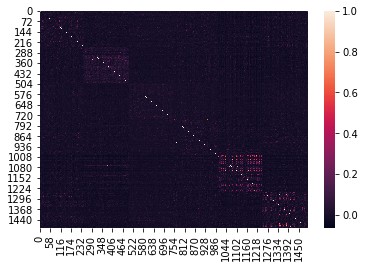

In [10]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity

W = cosine_similarity(X_sel)
sns.heatmap(W)

In [11]:
K = 25
W_gaus = cosine_similarity(X_sel)
np.fill_diagonal(W_gaus,0)

W = np.zeros(W_gaus.shape)
for idxrow in range(W_gaus.shape[0]):
    row = W_gaus[idxrow,:]
    maxkvalsidx = (-row).argsort()[:K]
    W[idxrow,maxkvalsidx] = row[maxkvalsidx]
W = (W + W.T)/2    
plt.figure(figsize = (20,20))
sns.heatmap(W)


<AxesSubplot:>

/home/pilavciy-admin/miniconda3/lib/python3.8/site-packages/pygsp/plotting.py:94: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show(warn=False)


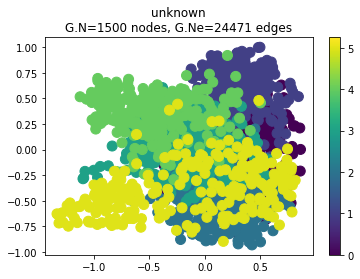

In [12]:
%matplotlib inline

from pygsp import graphs,filters,plotting

G = graphs.Graph(W)
G.compute_laplacian('combinatorial')

G.compute_fourier_basis(recompute=True)
#plt.plot(G.e)
    
G.set_coordinates()
G.plot_signal(y_sel)

In [13]:
G.is_connected()

True

In [14]:
from scipy.io import savemat
savemat('ENEN_normWeight.mat',{'ENEN_normWeight':W})
savemat('EN2EN_norm_Reduced.mat',{'EN2EN_norm_Reduced':X_sel})
savemat('EN2EN_Reduced_label.mat',{'EN2EN_Reduced_label':y_sel})